## 확률 변수로서의 모델 파라미터

https://mml-book.github.io/ 를 참고하여 작성했다고 함

$y=f(x)=ax+b$ ,  $a,b$ ∈ $R$

- 저 1차함수에서 a, b는 2차원 평면으로 나타낼 수 있는데,
- 그 2차원 평면의 모든 점은 각각 하나의 함수에 대응한다고 볼 수 있다.
- 그리고 그 2차원 평면은 `파마리터 공간(space)`라고 부를 수 있다.

> 아래는 파라미터 공간에서 두 점 $a$, $b$를 뽑아 $y=ax+b$의 그래프를 그리는 코드입니다. 이론상으로는 실수 집합 전체에서 샘플링을 해야 하지만 코드로 구현하기가 불가능하고, 간단한 시각화를 위해 [-10, 10] 구간에서 샘플링했습니다.



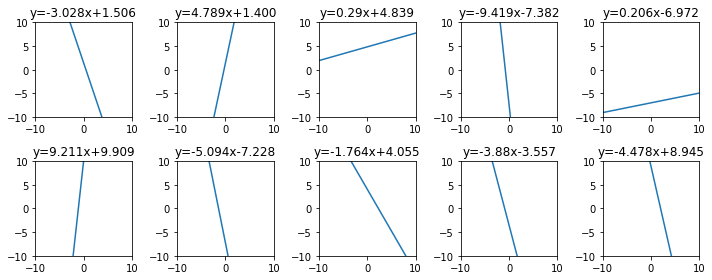

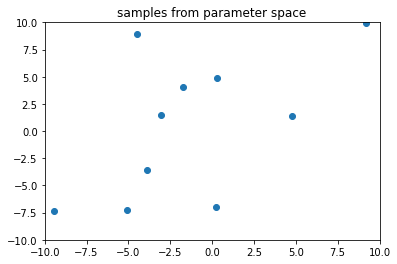

In [1]:
import numpy as np
import matplotlib.pyplot as plt

parameter_points = []
fig1, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.uniform: 정해진 구간에서 수를 무작위로 추출하여 반환합니다.
    a, b = np.random.uniform(-10, 10, size=2)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

> - 아래 코드의 직관적 의미는
> - a=1, b=0을 평균으로 하는 분포에서 a, b를 골라내면(즉, 절편이 0이고 기울기가 1이므로 다른 2차원 공간에서 y=x가 평균이 되게 하는)
> - 대부분 저렇게 비슷하게 직선이 그어진다는 것

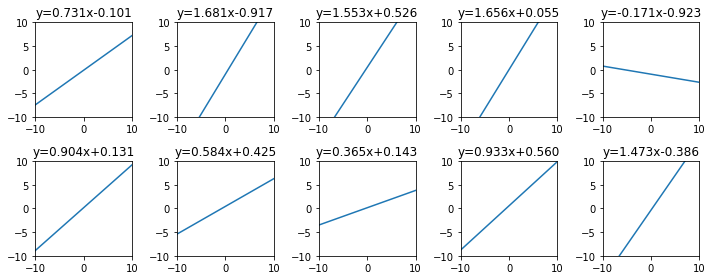

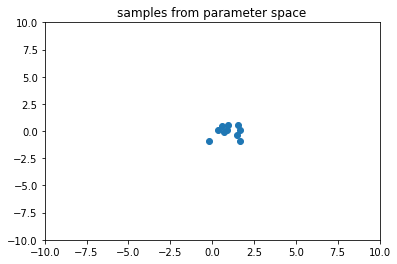

In [2]:
parameter_points = []
fig, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.normal: 정규분포를 따르는 확률 변수의 랜덤한 값을 반환합니다.
    a, b = np.random.normal(loc=[1, 0], scale=0.5)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

## posterior와 prior, likelihood 사이의 관계

- 베이지안 머신러닝 모델은 데이터를 통해 `파라미터 공간의 확률 분포`를 학습한다.
- 파라미터를 고정된 변수로 놓는 것이 아닌 불확실성을 가진 `확률 변수`이고
- 이 변수가 데이터를 관찰하면서 업데이트된다고 보는 것

### 사전 확률, 가능도, 사후 확률(prior, likelihood, posterior)

#### Prior
- 데이터를 관찰하기 전 파라미터 공간에 주어진 확률 분포 $p(\mathbf{\theta})$를 **prior**(prior probability, **사전 확률**)이라고 한다.
- 만약 prior 분포를 고정시킨다면, 주어진 파라미터 분포에 대해서 우리가 갖고 있는 데이터가 얼마나 '그럴듯한지' 계산할 수 있다. 이것을 나타내는 값이 **likelihood**(가능도, 우도).
- 식으로는 $p(X=x∣θ)$
- 즉, 파라미터의 분포 $p(\mathbf{\theta})$가 정해졌을 때 xx라는 데이터가 관찰될 확률
- 결국 우리가 구하고 싶은 것은 모델의 파라미터 $\mathbf{\theta}$의 값이고, 데이터는 이미 알고 있는 고정된 값이니까
- likelihood가 높다는 것은 곧 우리가 지정한 파라미터 조건에서 데이터가 관찰될 확률이 높다는 것이고, 데이터의 분포를 모델이 잘 표현하는 것이라고 생각할 수 있다.
- 그래서 데이터들의 likelihood 값을 최대화하는 방향으로 모델을 학습시키는 방법을 **최대 가능도 추정(maximum likelihood estimation, MLE)**이라고 한다.

#### Posterior
- 반대로, 데이터 집합 $X$가 주어졌을 때 파라미터 $\mathbf{\theta}$의 분포 $p(\mathbf{\theta}|X)$를 생각해 볼 수 있다.
- 이 값을 '데이터를 관찰한 후 계산되는 확률'이라는 뜻에서 **posterior(posterior probability, 사후 확률)** 라고 부른다.
- 생각해 보면 이게 우리한테 필요한 값인데, 데이터 포인트의 개수는 유한하기 때문에 데이터가 따르는 확률 분포 $p(X)$는 우리가 정확하게 알 수 없다.
- 애초에 머신러닝의 목표가 $p(X)$를 직접 구할 수가 없으니까 모델 파라미터 $\mathbf{\theta}$를 조절해가며 간접적으로 근사하는 것이었음.
- 그래서 posterior를 직접 계산해서 최적의 $\mathbf{\theta}$ 값을 찾는 것이 아니라, **prior와 likelihood에 관한 식**으로 변형한 다음, 그 식을 최대화하는 파라미터 $\mathbf{\theta}$를 찾는다.
- 이렇게 posterior를 최대화하는 방향으로 모델을 학습시키는 방법을 **최대 사후 확률 추정(maximum a posteriori estimation, MAP)** 이라고 함

## likelihood와 머신러닝

- 머신러닝 모델은 어디까지나 한정된 파라미터로 데이터의 실제 분포를 근사하는 역할을 하기 때문에, 어떤 데이터가 들어와도 100%의 정확도를 내는 모델을 만들기는 불가능함
- 그래서 모델이 입력 데이터로부터 예측한 출력 데이터(prediction)와 우리가 알고 있는 데이터의 실제 값(label) 사이에는 오차가 생기게 되는데,
- 이 오차를 우리에게 관찰되는 데이터에는 이미 노이즈가 섞여있어서 발생한다고 해석한다.

- **likelihood**는 파라미터 분포가 주어졌을 때 특정 데이터가 관찰될 확률 $p(X=x|\mathbf{\theta})$를 나타냄
- 지도 학습의 예시에서는, 파라미터 분포 $\mathbf{\theta}$와 입력 데이터 $\mathbf{x}_n$ 이 주어졌을 때 라벨 $y_n$ 을 예측하는 문제가 됨. 
- 입력 데이터의 집합을 $X$, 라벨들의 집합을 $Y$라고 할 때, **likelihood**는 파라미터와 입력 데이터가 주어졌을 때 출력값(라벨)의 확률 분포, 즉 $p(Y|\mathbf{\theta}, X)$가 된다.

- 데이터셋 전체의 likelihood 대신 데이터 하나의 likelihood $p(y_n|\mathbf{\theta}$, $\mathbf{x}_n)$
 )을 생각해 보자.
- 출력값의 분포를 어떻게 생각할 수 있을까? 모델을 선형 모델 $y=\mathbf{\theta}^\top\mathbf{x}$로 잡았을 때, 출력값의 분포는 모델의 예측값 $\mathbf{\theta}^\top\mathbf{x}_n$에다가 노이즈의 분포를 더한 값이 될 것이다.
- 노이즈 분포를 `평균이 0`이고 표준편차가 $\sigma$인 정규분포로 가정한다면, 출력값의 분포는 평균이 $\mathbf{\theta}^\top\mathbf{x}_n$ 이고 표준편차가 $\sigma$인 정규분포가 된다.
![](https://images.velog.io/images/moondeokjong/post/746cb91d-1858-4cda-98ee-41685eb51834/Screenshot%202022-02-16%20at%2011.50.30%20AM.png)

- xy 평면 위에 모델에 해당하는 빨간색 직선이 있다. 출력값의 분포를 나타내기 위해서 $p(y)$ 좌표축을 추가했고,
- 입력 데이터가 $\mathbf{x}_n$ 일 때 모델의 예측값은 $\mathbf{\theta}^\top\mathbf{x}_n$ 이고, 출력값의 분포 $p(y_n|\mathbf{\theta}, \mathbf{x}_n)$ 은 노란색으로 표시한 정규분포 그래프가 된다.

 ![](https://images.velog.io/images/moondeokjong/post/4effa677-b126-4ec4-91ea-c55c66ab869a/Screenshot%202022-02-16%20at%2011.52.08%20AM.png)

## likelihood 감 잡기

- 아래는 5개의 데이터 포인트를 생성하고 그것에 노이즈를 입힌 것을 좌표평면에 나타냄

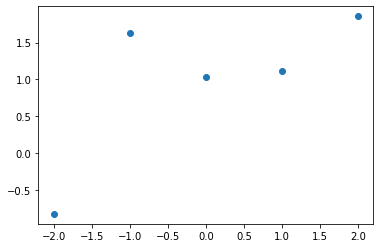

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

input_data = np.linspace(-2, 2, 5)
label = input_data + 1 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label)
plt.show()

In [4]:
input_data

array([-2., -1.,  0.,  1.,  2.])

In [5]:
label

array([-0.82748053,  1.63548253,  1.0373364 ,  1.11585031,  1.85680774])

- 위의 식에서 **1차함수 식**을 바꾸면 데이터포인트 5개의 likelihood가 어떻게 바뀌는지 보는 것으로 해석할 수 있다.

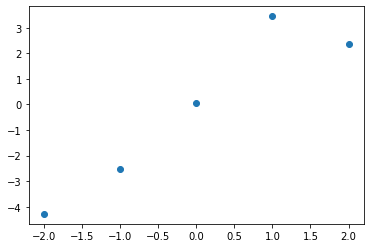

In [7]:
label2 = input_data * 2 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label2)
plt.show()

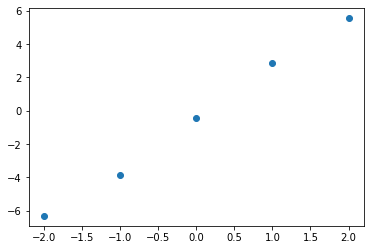

In [8]:
label3 = input_data * 3 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label3)
plt.show()

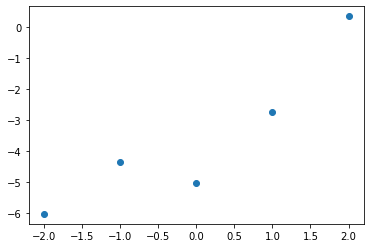

In [11]:
label4 = input_data -3 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label4)
plt.show()

#### 노이즈 분포의 표준편차는 데이터의 실제 분포와 관련된 값이라 우리가 알 수 없다
#### 그러나 MLE를 사용하면 표준편차를 알지 못해도 최적의 파라미터 값을 찾을 수 있다.

- 한번 likelihood가 어떻게 바뀌는지 봐보자


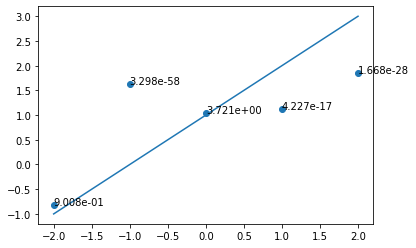

In [12]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 1
b = 1
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

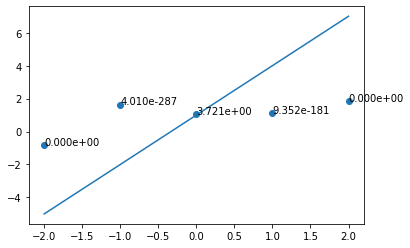

In [13]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 3
b = 1
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

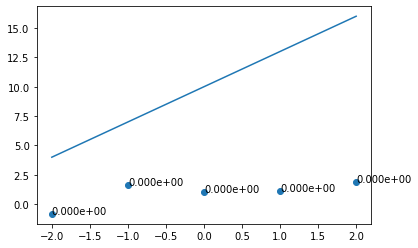

In [14]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 3
b = 10
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

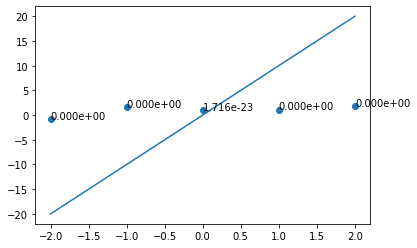

In [16]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 10
b = 0 
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

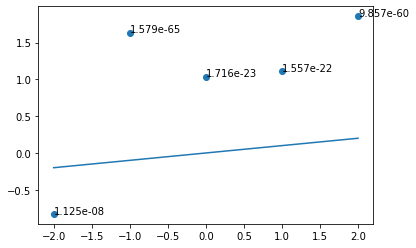

In [17]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 0.1
b = 0 
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

### likelihood가 왜 중요한가?

- 위 예제에서 보이듯이, 데이터 포인트가 모델 함수에서 멀어질수록 데이터의 likelihood는 기하급수적으로 감소한다.
- likelihood를 구하는 식을 보면 모델 예측값과 데이터 라벨의 차이를 제곱해서 exponential 위에 올려놓은 것을 확인할 수 있다.
- 그래서 예측값과 라벨의 차이가 조금만 벌어져도 likelihood 값은 민감하게 반응한다.
- #### 머신러닝의 목표가 데이터 포인트들을 최대한 잘 표현하는 모델을 찾는 것이었다는 사실을 생각하면, 결국 데이터 포인트들의 likelihood 값을 크게 하는 모델을 찾는 것이 목표가 된다.
- #### 바로 그렇게 데이터의 likelihood 값을 최대화하는 모델 파라미터를 찾는 방법이 최대 가능도 추론(maximum likelihood estimation, MLE).

## MLE: 최대 가능도 추론

### 데이터셋 전체의 likelihood

- 좋은 머신러닝 모델은 하나의 데이터에 대해서만 likelihood가 큰 모델이 아니라, 데이터셋에 있는 모든 데이터 포인트의 likelihood 값을 크게 만드는 모델
- 데이터셋 전체의 likelihood는 어떻게 구하면 좋을까?

- 우리가 가지고 있는 데이터 포인트 $(\mathbf{x}_1, y_1)$, $\dots$, $(\mathbf{x}_n, y_n)$은 서로 독립이고(independent) 같은 확률 분포를 따른다고(identically distributed) 가정
- 이 조건을 independent and identically distributed, 줄여서 i.i.d.라고 부르는데, **머신러닝 문제에서 꼭 필요한 전제조건** 이다.
- 데이터 포인트들이 서로 독립이므로, 데이터셋 전체의 likelihood $p(Y|\mathbf{\theta}, X)$는 데이터 포인트 각각의 likelihood를 모두 곱한 값과 같다.

![](https://images.velog.io/images/moondeokjong/post/684e391b-c7eb-431b-9098-9637f96c651c/Screenshot%202022-02-16%20at%2012.16.18%20PM.png)

- MLE를 실제로 적용할 때는 likelihood 대신 log likelihood를 최대화하는 파라미터를 구한다다. 
- 왜냐하면 데이터셋의 likelihood가 데이터 포인트 각각의 likelihood를 곱한 형태인데, 로그를 씌우면 곱셈 연산이 덧셈 연산으로 바뀌면서 미분 계산이 편리해져서이다.
- 또한 로그 함수는 단조 증가(monotonically increasing)하므로 likelihood를 최대화하는 파라미터와 log likelihood를 최대화하는 파라미터 값이 같아서 학습 결과에 영향을 주지 않는다.

> - 구현 측면에서 보면, 앞 스텝의 예제에서 보셨듯이 likelihood 값은 0에 가까운 수로 많이 계산된다. 
> - 이 수들을 곱하다 보면 CPU가 계산할 수 있는 범위를 넘어서는 언더플로우가 발생할 가능성이 있다.
> - 그러나 likelihood 값에 로그를 씌우면 이런 문제를 예방할 수 있다.

![](https://images.velog.io/images/moondeokjong/post/144e5553-f565-4061-96db-8bd996ecda8a/Screenshot%202022-02-16%20at%2012.28.33%20PM.png)

likelihood를 최대화하는 파라미터를 $\mathbf{\theta}_{ML}$(ML: maximum likelihood)이라고 하면

![](https://images.velog.io/images/moondeokjong/post/8a785a50-7272-4eee-b47b-5e279891b444/Screenshot%202022-02-16%20at%2012.29.16%20PM.png)

- θ와 관계없는 부분을 빼고 식을 정리하면 다음과 같다.
- 손실 함수를 최소화하는 관점에서, log likelihood를 최대화하는 대신 negative log likelihood $(-\log p(Y|\mathbf{\theta}, X))$를 최소화하는 식으로 나타내기도 한다

![](https://images.velog.io/images/moondeokjong/post/fcfbede5-b222-4282-a9a8-e44e75d415b1/Screenshot%202022-02-16%20at%2012.31.07%20PM.png)

- 최소제곱법(least square)의 식과 같은 것을 확인할 수 있다. 
- 최소제곱법은 선형 모델에서 노이즈의 분포가 $\mathcal{N}(0,\sigma^2)$라고 가정할 때 **negative log likelihood**를 최소화하는 파라미터 값을 찾는 것과 본질적으로 같다.
- 우리가 최소화해야 할 식을 $\mathbf{\theta}$에 대한 함수 $\mathcal{L}(\mathbf{\theta})$로 놓으면
![](https://images.velog.io/images/moondeokjong/post/85beac4c-4999-47d7-9f58-8bc3d819652d/Screenshot%202022-02-16%20at%2012.32.47%20PM.png)
- #### L(θ)를 최소화하는 $\mathbf{\theta}$의 값은 $\mathcal{L}(\mathbf{\theta})$를 $\mathbf{\theta}$θ에 대해 미분한 식을 0으로 만드는 $\mathbf{\theta}$의 값과 같다.
- 물론 일반적으로는 도함수의 부호 변화나 local minimum 여부 등을 모두 따져야 하지만, 
- $\mathcal{L}(\mathbf{\theta})$는 $\mathbf{\theta}$에 대한 이차식이므로 유일한 최솟값을 가진다. 
- 따라서 도함수를 0으로 만드는 $\mathbf{\theta}$값을 찾는 것으로도 충분하다.

![](https://images.velog.io/images/moondeokjong/post/e5899ae7-b498-49c3-af61-2b9f8debf035/Screenshot%202022-02-16%20at%2012.35.09%20PM.png)

### maximum 'log' likelihood

![](https://images.velog.io/images/moondeokjong/post/ce2d431c-f09a-415a-85bf-e899bb5d8010/Screenshot%202022-02-16%20at%2012.37.03%20PM.png)
![](https://images.velog.io/images/moondeokjong/post/f45b3360-a40e-4436-ab2e-ca6ccae2daf9/Screenshot%202022-02-16%20at%2012.37.09%20PM.png)

## MLE 최적해 구하기

### 데이터셋 생성

- MLE를 이용해 최적의 파라미터를 찾아보고 데이터셋의 likelihood도 계산해 보자. 
- 아래 코드는 $y=x+1$ 함수를 기준으로 랜덤한 노이즈를 섞어서 데이터 포인트 20개를 생성하고 시각화하는 코드.
- 데이터 생성 단계에서 지정한 노이즈의 분포는 평균이 0이고 표준편차가 0.5인 정규분포.

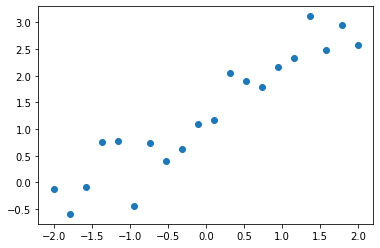

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 20

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

plt.scatter(input_data, labels)
plt.show()

### likelihood와 파라미터 계산

- 데이터를 생성할 때는 노이즈 분포의 표준편차를 0.5로 정했지만 데이터를 관찰하고 모델을 설계하는 입장에서는 노이즈의 원래 표준편차를 알 수 없다. 
- 노이즈의 표준편차를 0.1로 가정했다고 하면, likelihood와 negative log likelihood는 다음과 같이 계산된다.
![](https://images.velog.io/images/moondeokjong/post/a01860ec-4c6b-4f6e-90a8-8e3d633ebc77/Screenshot%202022-02-16%20at%2012.40.13%20PM.png)

- 구현에서 주의해야 할 부분은, 입력 데이터가 실수 스칼라 값을 갖는 것처럼 보이지만 실제로는 변수 $x$와 상수항이 묶인 2차원 열벡터로 표현된다는 것
![](https://images.velog.io/images/moondeokjong/post/e4d250fc-7f59-4868-8bdf-2ebad2b5e3b5/Screenshot%202022-02-16%20at%2012.41.17%20PM.png)

- MLE의 최적 파라미터 $\mathbf{\theta}_{ML}$ 은 다음과 같이 계산된다.
![](https://images.velog.io/images/moondeokjong/post/311f16eb-8a08-42da-98cc-d8207db8129a/Screenshot%202022-02-16%20at%2012.44.52%20PM.png)

- 위의 식을 코드로 구현해서 구해보면,
- 아래 코드로 구한 최적의 모델은 $y=0.8578x+1.2847$이다. 
- 데이터 포인트들이 $y=x+1$ 함수로부터 생성된 것을 생각하면 꽤 가까운 결과가 나왔다.


In [19]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

> #### 신기한 게 optimization 같이 여러번 반복해서 구한 게 아님에도 저 수식 하나로 파라미터가 구해진다.
> #### 아마 Loss 함수의 미분 값이 0이 되는 식으로 이미 방정식을 만들어놓아서 그런 것 같다.

slope: 0.8578 bias: 1.2847
likelihood: 2.9724e-54
negative log likelihood: 1.2325e+02


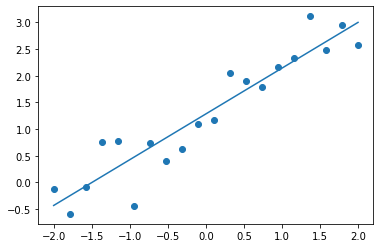

In [29]:
# X: 20x2 matrix, y: 20x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples, 1)), axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('slope: '+'%.4f'%theta_1+' bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: '+'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2, 2, 50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

-----------
-----------
-----------
-----------

In [21]:
X

array([[-2.        ,  1.        ],
       [-1.78947368,  1.        ],
       [-1.57894737,  1.        ],
       [-1.36842105,  1.        ],
       [-1.15789474,  1.        ],
       [-0.94736842,  1.        ],
       [-0.73684211,  1.        ],
       [-0.52631579,  1.        ],
       [-0.31578947,  1.        ],
       [-0.10526316,  1.        ],
       [ 0.10526316,  1.        ],
       [ 0.31578947,  1.        ],
       [ 0.52631579,  1.        ],
       [ 0.73684211,  1.        ],
       [ 0.94736842,  1.        ],
       [ 1.15789474,  1.        ],
       [ 1.36842105,  1.        ],
       [ 1.57894737,  1.        ],
       [ 1.78947368,  1.        ],
       [ 2.        ,  1.        ]])

In [25]:
np.append(X, np.ones(X.shape), axis=1)

array([[-2.        ,  1.        ,  1.        ,  1.        ],
       [-1.78947368,  1.        ,  1.        ,  1.        ],
       [-1.57894737,  1.        ,  1.        ,  1.        ],
       [-1.36842105,  1.        ,  1.        ,  1.        ],
       [-1.15789474,  1.        ,  1.        ,  1.        ],
       [-0.94736842,  1.        ,  1.        ,  1.        ],
       [-0.73684211,  1.        ,  1.        ,  1.        ],
       [-0.52631579,  1.        ,  1.        ,  1.        ],
       [-0.31578947,  1.        ,  1.        ,  1.        ],
       [-0.10526316,  1.        ,  1.        ,  1.        ],
       [ 0.10526316,  1.        ,  1.        ,  1.        ],
       [ 0.31578947,  1.        ,  1.        ,  1.        ],
       [ 0.52631579,  1.        ,  1.        ,  1.        ],
       [ 0.73684211,  1.        ,  1.        ,  1.        ],
       [ 0.94736842,  1.        ,  1.        ,  1.        ],
       [ 1.15789474,  1.        ,  1.        ,  1.        ],
       [ 1.36842105,  1.

In [27]:
input_data.reshape((-1, 1))

array([[-2.        ],
       [-1.78947368],
       [-1.57894737],
       [-1.36842105],
       [-1.15789474],
       [-0.94736842],
       [-0.73684211],
       [-0.52631579],
       [-0.31578947],
       [-0.10526316],
       [ 0.10526316],
       [ 0.31578947],
       [ 0.52631579],
       [ 0.73684211],
       [ 0.94736842],
       [ 1.15789474],
       [ 1.36842105],
       [ 1.57894737],
       [ 1.78947368],
       [ 2.        ]])

-----------
-----------
-----------
-----------

## MAP: 최대 사후 확률 추정

### prior 분포의 등장

- 선형 회귀 문제에서 MLE로 구한 최적 파라미터 식을 다시 살펴보자. $\mathbf{\theta}_{ML} = (X^\top X)^{-1}X^\top\mathbf{y}$
- $X$는 데이터셋 행렬이고, $\mathbf{y}$는 라벨들을 모아놓은 벡터. 
- 이 식에서 알 수 있는 것은, MLE의 최적해는 **오로지 관측된 데이터 값에만 의존 한다는 사실**이다.

- 물론 이런 접근법은 계산이 비교적 간단하다는 장점이 있지만, 
- 관측된 데이터에 노이즈가 많이 섞여 있는 경우, 이상치(outlier) 데이터가 존재하는 경우에는 모델의 안정성이 떨어진다는 단점도 있다.

- MAP는 데이터셋이 주어졌을 때 파라미터의 분포, 즉 $p(\mathbf{\theta}|X)$에서 확률 값을 최대화하는 파라미터 $\mathbf{\theta}$를 찾는다. 
- 직관적으로 이야기하면 '이런 데이터가 있을 때 파라미터의 값이 무엇일 확률이 제일 높은가?'를 푼다.

- 지도 학습의 경우 posterior는 $p(\mathbf{\theta}|X,Y)$로 나타낼 수 있다. 
- 이 식을 prior $p(\mathbf{\theta})$와 likelihood $p(Y|\mathbf{\theta},X)$에 관한 식으로 변형하면 다음과 같다.

![](https://images.velog.io/images/moondeokjong/post/2e7e348c-f12b-4498-b03a-eb7d38288af3/Screenshot%202022-02-16%20at%202.20.37%20PM.png)

- prior 분포 $p(\mathbf{\theta})$는 관찰된 데이터가 없을 때 파라미터 공간에 주어진 확률 분포이다. 
- $p(\mathbf{\theta}=\theta_0)$ 값을 크게 만드는 파라미터 $\mathbf{\theta}_0$을 '그럴듯한' 파라미터로 생각하는 것이다.
- 여기에서는 $p(\mathbf{\theta})$를 평균이 $(0,0)$이고 공분산 $\Sigma=\alpha^2\mathbf{I}$인 정규분포로 정의 ($\Sigma=\alpha^2\mathbf{I}$이므로 $|\Sigma|=\alpha^4$, $\Sigma^{-1}=(1/\alpha^2)\mathbf{I}$

 ![](https://images.velog.io/images/moondeokjong/post/f4bbfb8c-5ddd-4cbf-9716-ee81abb9413b/Screenshot%202022-02-16%20at%202.54.08%20PM.png)

- MLE에서 negative log likelihood를 최소화했던 것과 같이, MAP에서도 실제로는 posterior를 최대화하는 파라미터 대신 negative log posterior를 최소화하는 파라미터 값을 구한다.
- 식을 정리하면,
![](https://images.velog.io/images/moondeokjong/post/08252dd5-b284-41b6-bbed-b032a67fe73c/Screenshot%202022-02-16%20at%202.55.08%20PM.png)
- $logp(Y∣X)$ 부분은 $\mathbf{\theta}$에 의한 식이 아니므로 제외하면
![](https://images.velog.io/images/moondeokjong/post/2d2e4442-0ef9-43b1-890d-f7db758af9b2/Screenshot%202022-02-16%20at%202.55.11%20PM.png)

- 우리가 최소화해야 할 posterior 함수를 편의상 $\mathcal{P}(\mathbf{\theta})$로 놓으면(일반적인 notation 아님)
![](https://images.velog.io/images/moondeokjong/post/6723142f-8453-4c61-bc1c-cc21658bc18c/Screenshot%202022-02-16%20at%202.57.48%20PM.png)

![](https://images.velog.io/images/moondeokjong/post/fb377d50-959d-41a3-824e-9993234a0503/Screenshot%202022-02-16%20at%202.58.31%20PM.png)
![](https://images.velog.io/images/moondeokjong/post/71d03a79-01a5-418a-8815-3e23a28239a7/Screenshot%202022-02-16%20at%202.58.38%20PM.png)

- MLE의 최적 파라미터 $\mathbf{\theta}_{ML} = (X^\top X)^{-1}X^\top\mathbf{y}$와 비교하면, 
- 다른 점은 $(\sigma^2/\alpha^2)\mathbf{I}$항이 더해졌다는 것. 
- 노이즈 분포의 분산 $\sigma^2$과 파라미터 분포의 분산 $\alpha^2$ 모두와 연결된 부분인데,
- MLE와 MAP를 구분 지어주는 이 항이 어떤 의미를 가지고 있을까?

### MAP as L2 regularization

![](https://images.velog.io/images/moondeokjong/post/99e81b1f-e055-407e-a848-7b9d50116416/Screenshot%202022-02-16%20at%203.01.25%20PM.png)
![](https://images.velog.io/images/moondeokjong/post/d0e1aa39-c6f2-47a3-a1e8-e5b4eaa7e027/Screenshot%202022-02-16%20at%203.01.31%20PM.png)

## MLE와 MAP의 비교

### 데이터셋 생성

- MAP는 MLE와 비슷하지만 정규화 항에 해당하는 negative log prior 부분이 존재한다는 차이가 있었다. 
- 그래서 MLE 모델보다 MAP 모델이 더 안정적이라고 밝혔는데,
- 이상치(outlier)가 있는 데이터셋을 이용해서 MAP와 MLE를 비교해 보도록 해보자.

- 이전 예제와 마찬가지로 y=x+1y=x+1 함수값에 랜덤한 노이즈를 더해서 데이터 포인트들을 생성.
- 실험 결과 이상치 데이터 한 개를 데이터 포인트 20개에 추가하는 것으로는 모델에 큰 영향을 주지 못해서 데이터 포인트를 10개로 줄이고 이상치 데이터도 2개 추가
- 그래프에서 $(0.5,9)$, $(1.5, 10)$ 위치의 이상치 데이터를 확인할 수 있다.

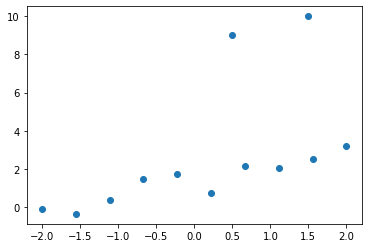

In [30]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5])
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

### 파라미터 계산

- MLE와 MAP의 최적 파라미터는 각각 다음과 같다.
![](https://images.velog.io/images/moondeokjong/post/43ae834d-b738-4f82-8da8-ceb3149d9a5f/Screenshot%202022-02-16%20at%202.36.10%20PM.png)
- 노이즈 분포의 표준편차 $\sigma$는 0.1로 가정하고, 파라미터 분포의 표준편차 $\alpha$는 0.04로 지정. 
- 정규화 상수 $\lambda$가 $\alpha^2$ 에 반비례하는 값. 
- $\alpha$가 작을수록, 즉 파라미터 분포의 표준편차를 작게 잡을수록 파라미터 값에 대한 제약 조건을 강하게 걸어주는 것과 같다.
- 정규화 측면에서 봐도 $\lambda$ 값이 클수록 모델의 유연성은 감소.

In [31]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


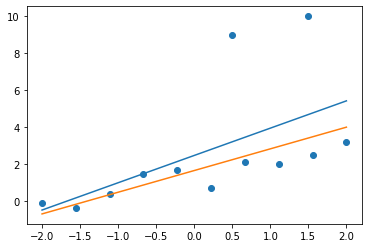

In [32]:
# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()

- 위 그래프에서 파란색 직선과 주황색 직선은 각각 MLE, MAP를 이용해 찾은 모델을 나타낸다.
- 파란색 직선은 이상치 데이터까지 포함한 negative log likelihood를 감소시키기 위해 직선이 위로 치우쳐서 아래쪽 10개 데이터의 경향성에서는 약간 벗어났다. 
- 반면 주황색 직선은 이상치 데이터가 추가되어도 아래쪽 데이터에서 크게 벗어나지는 않고 있다.
- 원래 데이터 분포에서 멀리 떨어진 이상치 데이터가 추가되었기 때문에, likelihood의 값은 언더플로우가 발생해서 0으로 표시됨


- negative log likelihood의 값을 보면 MLE 결과와 MAP 결과를 비교할 수 있다. 
- MAP가 MLE에 비해 negative log likelihood 값이 크지만(likelihood가 작지만), 이상치 데이터가 추가되었을 때 모델 파라미터의 변화는 MLE보다 작다.